In [5]:
import pandas as pd
import numpy as np
import altair as alt

alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

## 1. Description

Our industry partner is the Canada Digital Analytics Team. They want to help the websites visitors to more easily access to the information they are looking for. Visitors could fill a form when they face problem to find the information and their open feedbacks are then collected as text comments. We would build a multi-class classification to predict the tag which could identify visitor's purpose. The hierarchy and classes of tags are given by our partner in Canada Government. We are also open to improve the classes of tags by somen computational ligustic techniques we learn in MDS-CL courses in a later stage of the project.

By the end of the project, our data product will enable our industry partner to use state-of-the-art Machine Learning techniques to label visitor responses. Processing can be done a larger scale, at a higher speed, and at a lower cost. This may, in turn, help the stakeholders to better understand what people visit their website to do.

## 2. Dataset
Our group will work with survey data from the Government of Canada website. The sample dataset is in csv format and consists of 1000 rows and 9 columns. Each column corresponds to information about the user's problem given the survey. Date is simply the date when the survey was filled by the user. Comment is the answer to the open response field of the survey that allows users to elaborate more on what they were after from the website. Problem shows the type of problem the user has. URL is the link where the user filled the survey. Language is either English or French. Institution is the government body that is most concerned with the user's problem. Section and Theme correspond to the general topic related to the comment and tag.

In [64]:
sample = pd.read_csv('data/sample_feedback.csv')

In [67]:
sample.head()

,Date,Comment,Problem,Tags,URL,Language,Institution,Section,Theme
0,2021-04-23,Pas capable d ouvrire le formulaire de l autor...,Je ne peux pas trouver l’information,Design / content,voyage.gc.ca/voyage-covid/voyage-restrictions/...,fr,Public Health Agency of Canada,travel-wizard,travel
1,2021-04-23,"Je suis étudiant en phD, La période de 14 jour...",Je ne peux pas trouver l’information,Hotels,voyage.gc.ca/voyage-covid/voyage-restrictions/...,fr,Public Health Agency of Canada,travel-wizard,travel
2,2021-04-23,Why is there an unreasonable delay in getting ...,NaN,Testing,travel.gc.ca/travel-covid/travel-restrictions/...,en,Public Health Agency of Canada,travel-wizard,travel
3,2021-04-23,the site won't allow to submit my phone number...,There was an error / something didn't work,Applying / reapplying,https://www.canada.ca/en/revenue-agency/servic...,en,CRA,CRB,Taxes
4,2021-04-23,what is the affects on older age groups,Other reason,Getting vaccinated - When / Where / What,https://www.canada.ca/en/health-canada/service...,en,Health Canada,Vaccines,Health


Some categorical columns consist of empty values.

In [65]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         1000 non-null   object
 1   Comment      1000 non-null   object
 2   Problem      675 non-null    object
 3   Tags         802 non-null    object
 4   URL          1000 non-null   object
 5   Language     999 non-null    object
 6   Institution  1000 non-null   object
 7   Section      997 non-null    object
 8   Theme        1000 non-null   object
dtypes: object(9)
memory usage: 70.4+ KB


There is a peculiar row that consists of an empty value for Language and Problem. It has a Tag related to vaccination but the institution is CRA and the theme is about Taxes.

In [35]:
sample.loc[sample["Language"].isnull()]

,Date,Comment,Problem,Tags,URL,Language,Institution,Section,Theme
381,2021-04-22,Phone number,NaN,Getting vaccinated - Registration / notifications,https://www.canada.ca/,NaN,CRA,CRSB,Taxes


Looking more closely at the data, we see that each comment is unique except for two instances of anonymized e-mail addresses. The most frequent problem users choose is 'I can't find the information' while the most frequent tag is 'Getting vaccinated - When / Where / What'. Following this, Public Health Agency of Canada is the most frequent  institution, and 'Vaccines' and 'Health' are the most frequent Section and Theme, respectively.

In [66]:
sample.describe()

,Date,Comment,Problem,Tags,URL,Language,Institution,Section,Theme
count,1000,1000,675,802,1000,999,1000,997,1000
unique,2,997,9,29,162,2,7,18,6
top,2021-04-22,####@####.####,I can't find the information,Getting vaccinated - When / Where / What,https://www.canada.ca/en/public-health/service...,en,Public Health Agency of Canada,Vaccines,Health
freq,717,2,347,128,58,831,445,390,433


We see here that there is significantly more English data than French data.

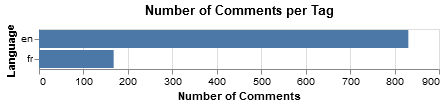

In [81]:
(alt.Chart(sample.loc[sample['Language'].isnull()==False], 
           title=alt.TitleParams(text='Number of Comments per Tag')
).mark_bar().encode(
    alt.X('count()', title='Number of Comments'),
    alt.Y('Language', sort="-x")))

The 9 unique problems consist of problems in English and their French translations. We see that in both French and English surveys, the most common problem is lack of information. For English, the least common is 'The information isn't clear' while for French, it is 'Il y avait une erreur ...'

In [69]:
sample['Problem'].unique()

array(['Je ne peux pas trouver l’information', nan,
       "There was an error / something didn't work", 'Other reason',
       "I can't find the information", 'The answer I need is missing',
       'The information is hard to understand',
       'The information isn’t clear',
       "L'information est difficile à comprendre",
       'Il y avait une erreur / quelque chose ne fonctionnait pas'],
      dtype=object)

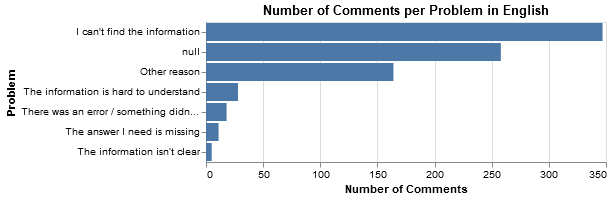

In [83]:
en_prob_count = alt.Chart(sample.loc[sample['Language']=='en'], 
           title=alt.TitleParams(text='Number of Comments per Problem in English')
).mark_bar().encode(
    alt.X('count()', title='Number of Comments'),
    alt.Y('Problem', sort="-x"))

en_prob_count

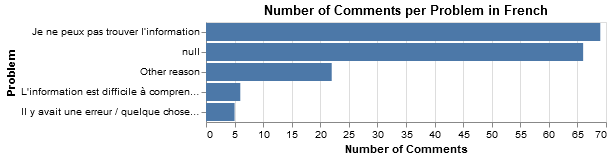

In [77]:
fr_prob_count = alt.Chart(sample.loc[sample['Language']=='fr'], 
           title=alt.TitleParams(text='Number of Comments per Problem in French')
).mark_bar().encode(
    alt.X('count()', title='Number of Comments'),
    alt.Y('Problem', sort="-x"))

fr_prob_count

There are 29 unique tags with 'Getting vaccinated - When / Where / What' occurring 128 times followed by 'Hotels' and 'Vaccine safety'. The least frequent tag is 'Calculation' followed by 'EI' and 'Symptoms'

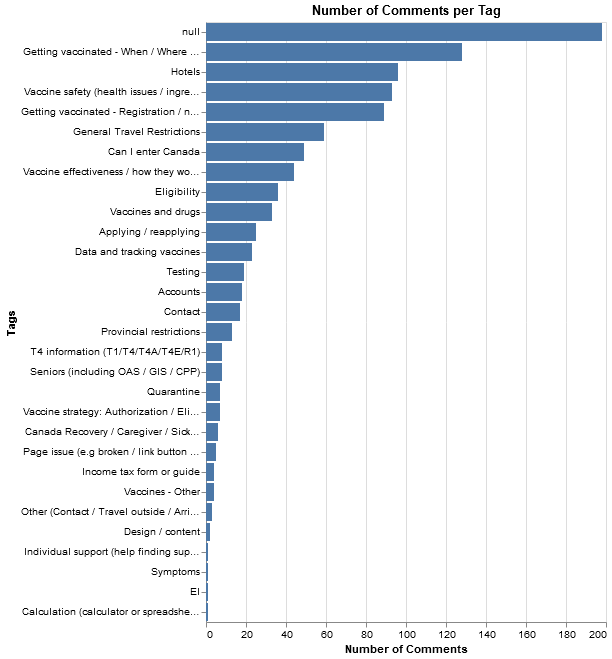

In [57]:
tag_count = alt.Chart(sample, 
           title=alt.TitleParams(text='Number of Comments per Tag')
).mark_bar().encode(
    alt.X('count()', title='Number of Comments'),
    alt.Y('Tags', sort="-x"))

tag_count

In [42]:
sample = sample.drop([0,381])

Splitting the languages, we see that the French surveys actually have a different distribution of tags. For English, the most frequent tag is indeed 'Getting vaccinated - When / Where / What' followed by 'Getting vaccinated - Registration / notification'. However, for French it is actually 'Hotels' followed by 'Vaccine Safety'.

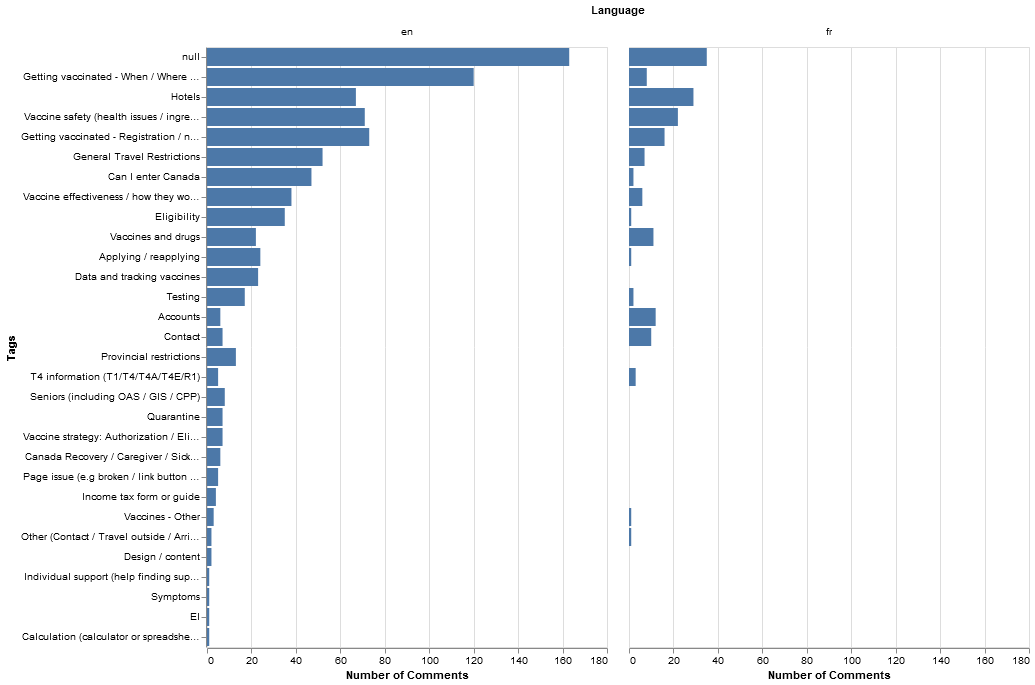

In [58]:
tag_count.facet('Language')

## 3. Deliverables

- Core deliverables:
    - Data analysis and visualization for each domain(vaccination, entry Canada, etc)
    - ML model which can predict tags given comments and result evaluation


- Additional deliverables:
    - Interface to show visualization
    - Interface where you can upload an CSV file and can download the same CSV file with annotional column “tag”

## 4. Methods 
The main task of this project is to predict and generate the closest tags based on the comments of users when they fill the problem form in the Canada.ca websites. Because the tags are given and fixed, we would try different multi classification models to find the most suitable model. And an appropriate interface to deliver the outcomes would be included in our plan.

### 4.1 Packages and libraries
- Numpy:  scientific computing
- Pandas: data wrangling
- Pytorch: machine learning frameworks
- Altair / Matplotlib: Visualization
- NLTK: processing the text feature

### 4.2 Data handling
Since the data is stored in .csv files, we would use Pandas for data preprocessing or wrangling if necessary.

### 4.3 Models
There are several algorithms and off-the-shelf models of multi classification tasks. We would experiment most of them to find the most suitable one based on the giving data set.
Dummy classifier: based on the cosine distance between the most frequent word in comment and tags.
Decision trees: random forest, XGBoost, Light GBM
Linear regression
Naive bayes
LSTM
BERT classification

### 4.4 Evaluation
Because the distribution of tags is imbalanced, we would evaluate the performance of models by accuracy and f1 score.
Accuracy
F1 score: macro average / weighted average

### 4.5 Implementation and delivery
Source code with trained model
Interface to generate tags based on the comments
Document of code and interface
Final report

## 5. Schedule

- Week 1 (May 10th - May 14th): Project Plan + Exploratory Data Analysis
- Week 2 (May 17th - May 21st): Building a baseline model 
- Week 3 (May 24th - May 28th): Build a more sophisticated model (e.g. SVM)
- Week 4 (May 31st - June 4th): Build a deep-learning model (e.g. BERT)
- Week 5 (June 7th - June 11th): Hyperparameter tuning for both models
- Week 6 (June 14th - June 18th): Building a User Interface (optional)
- Week 7 (June 21st - June 25th): Final Report and Presentation

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=eac5b341-69b9-4f15-a1c0-8b69564b53cc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>